In [17]:
datasetName = 'eye_retina_Menon2019'
#datasetName value: organ_tissue_authorYear without space
dataFormat = '10x'
#dataFormat value: tsv (tab separated), 10X (sparse)
setwd("/stor/public/hcad/eye_retina_Menon2019")

In [18]:
library(Matrix)
matrix_dir = "/stor/public/hcad/eye_retina_Menon2019/eye_retina_Menon2019_expression_10x/"
barcode.path <- paste0(matrix_dir, "barcodes.tsv")
features.path <- paste0(matrix_dir, "genes.tsv")
matrix.path <- paste0(matrix_dir, "matrix.mtx")
data.matrix <- as.matrix(readMM(file = matrix.path))
feature.names = read.delim(features.path, 
                           header = FALSE,
                           stringsAsFactors = FALSE)
barcode.names = read.delim(barcode.path, 
                           header = FALSE,
                           stringsAsFactors = FALSE)
colnames(data.matrix) = barcode.names$V1
rownames(data.matrix) = feature.names$V1

In [19]:
data.matrix

,AAACCCAAGTTACTCG-1,AAACCCAGTGGAACAC-1,AAACGAAAGAGAGGTA-1,AAACGAACAGGTTTAC-1,AAACGCTCAATGTCTG-1,AAACGCTCAGCGTATT-1,AAACGCTTCGCTTGCT-1,AAAGAACCACATTCTT-1,AAAGAACTCTTGTTAC-1,AAAGGGCAGACCAACG-1,⋯,TTTCACAGTCTGGTTA-2,TTTCACATCTCGTCGT-2,TTTCAGTCACTAACCA-2,TTTGACTCATCACAGT-2,TTTGACTGTCACAATC-2,TTTGGAGAGACTTAAG-2,TTTGGTTAGATCCCAT-2,TTTGGTTCAACCGATT-2,TTTGGTTGTTTGGAGG-2,TTTGTTGGTACCTTCC-2
RP11-34P13.7,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
FO538757.2,0,1,0,0,0,0,1,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
AP006222.2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
RP4-669L17.10,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
RP5-857K21.4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
RP11-206L10.4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
RP11-206L10.9,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,1,0,0,0,0
FAM87B,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
LINC00115,0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
FAM41C,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [20]:
library(Seurat)
library(data.table)
library(ggplot2)
# Load the organized dataset
# if(dataFormat == 'tsv'){
#     data.matrix <- data.table::fread(paste0(datasetName,"_expression.tsv.gz"), h = T, data.table = F)
# } else{
#    # system(paste0("tar -zxvf ", datasetName, "_expression_10x.tar.gz")) #Invoke the unix command
#    data.matrix <- Read10X(data.dir = paste0(datasetName,"_expression_10x"))
#    # data.dir: Directory containing the matrix.mtx, genes.tsv (or features.tsv), and barcodes.tsv files provided by 10X.
# }
# Load the metadata and annotation
data.metadata <- read.table(file = paste0(datasetName,"_metadata_10x.tsv"), h = T, sep = "\t", row.names = 5)
data.annotation <- read.table(file = paste0(datasetName,"_annotation_10x.tsv"), h = T, sep = "\t", row.names = 1)
if (file.exists(paste0(datasetName,"_annotation2.tsv"))) {
    data.annotation2 <- read.table(file = paste0(datasetName,"_annotation2.tsv"), h = T, sep = "\t", row.names = 1)
}


In [21]:
data.matrix[1:5, 1:5]
data.metadata[1:5, ]
data.annotation[1:5,]

,AAACCCAAGTTACTCG-1,AAACCCAGTGGAACAC-1,AAACGAAAGAGAGGTA-1,AAACGAACAGGTTTAC-1,AAACGCTCAATGTCTG-1
RP11-34P13.7,0,0,0,0,0
FO538757.2,0,1,0,0,0
AP006222.2,0,0,0,0,0
RP4-669L17.10,0,0,0,0,0
RP5-857K21.4,0,0,0,0,0


,organ,region,subregion,sample_status,donor_ID,donor_gender,donor_age
,<fct>,<fct>,<lgl>,<fct>,<int>,<fct>,<lgl>
AAACCCAAGTTACTCG-1,retina,MR2,NA,normal,574,M,NA
AAACCCAGTGGAACAC-1,retina,MR2,NA,normal,574,M,NA
AAACGAAAGAGAGGTA-1,retina,MR2,NA,normal,574,M,NA
AAACGAACAGGTTTAC-1,retina,MR2,NA,normal,574,M,NA
AAACGCTCAATGTCTG-1,retina,MR2,NA,normal,574,M,NA


[1] Rods      Rods      ACs       Macroglia BPs      
Levels: ACs BPs Cones Endo HCs Macroglia Microglia RGCs Rods

In [22]:
row.names(data.matrix)[duplicated(row.names(data.matrix))]

[1] "RGS5"      "CYB561D2"  "MATR3"     "PGM5-AS1"  "CCDC7"     "LINC01481"
[7] "CRHR1"

In [23]:
# Pre-processing
min.cells = 10
min.features = 300
nFeature_RNA_range = c(300, 2500)
percent.mt.thre = 5
# Modify the default value of these parameters according to original paper
dataobj <- CreateSeuratObject(counts = data.matrix, project = datasetName, min.cells = min.cells, min.features = min.features, meta.data = data.metadata)
dataobj <- AddMetaData(dataobj, metadata = data.annotation)
if (file.exists(paste0(datasetName,"_annotation2.tsv"))) {
    dataobj <- AddMetaData(dataobj, metadata = data.annotation2)
}

Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [24]:
dataobj

An object of class Seurat 
19159 features across 19195 samples within 1 assay 
Active assay: RNA (19159 features)

In [25]:
# QC
dataobj[["percent.mt"]] <- PercentageFeatureSet(dataobj, pattern = "^[Mm][Tt]")
dataobj <- subset(dataobj, subset = nFeature_RNA > nFeature_RNA_range[1] & percent.mt < percent.mt.thre)


In [26]:
# Normalization
# Two approaches
# 1. run standard log normalization 
dataobj <- NormalizeData(dataobj, normalization.method = "LogNormalize", scale.factor = 10000)
dataobj <- FindVariableFeatures(dataobj, selection.method = 'vst', nfeatures = 2000) # default feature number, nfeatures = 2000
dataobj <- ScaleData(dataobj, features = VariableFeatures(dataobj))
# 2. run sctransform 
# dataobj <- SCTransform(dataobj, vars.to.regress = "percent.mt", do.correct.umi = TRUE, do.scale = TRUE, do.center = TRUE)

Centering and scaling data matrix



In [27]:
# Dimensional Reduction
dataobj <- RunPCA(dataobj, features = VariableFeatures(object = dataobj))
# Determine the ‘dimensionality’ of the dataset according to elbow plot

PC_ 1 
Positive:  WIF1, FRZB, GLUL, CLU, DKK3, RGR, RLBP1, SPP1, CRABP1, TRDN 
	   PTGDS, TF, APOE, CA2, GPX3, HES1, SLC1A3, GPR37, SEPP1, SOX2 
	   PRSS35, CP, PCSK2, CRYAB, RAX, IGFBP5, GPM6B, RARRES2, CD9, C1orf61 
Negative:  PDE6G, AIPL1, RCVRN, IMPG1, KCNV2, CABP5, CADPS, SNAP25, CAMK2B, RTBDN 
	   TMEM215, SYNE1, GRM6, TRPM1, PODXL, PLPP2, CPLX3, SLC24A4, SEPT4, YBX3 
	   MEIS2, DLG2, VSX1, PCP4, KCNH2, PRDM8, GRIA2, NETO1, EPS8, KIF5C 
PC_ 2 
Positive:  PDE6G, GPX3, CRABP1, TF, RLBP1, APOE, CLU, C1orf61, LINC00844, PTGDS 
	   FABP7, AIPL1, DAPL1, CRYAB, FRZB, WIF1, DKK3, CA2, RARRES2, TSC22D4 
	   GLUL, RCVRN, METRN, RGR, FXYD1, CRYM, FXYD3, TRDN, SPP1, RAX 
Negative:  CAMK2B, NEAT1, CADPS, TMEM215, PLXDC1, TRPM1, GRM6, SRGN, KCNMA1, PRDM8 
	   CHN2, DOK6, TMSB4X, KLF2, VSX1, RGS16, LRTM1, S100A11, TRNP1, BST2 
	   CA10, EDIL3, CPLX3, KIF5C, GABRA1, SLC24A4, CCDC136, GRIA2, KCNH2, ISL1 
PC_ 3 
Positive:  CAMK2B, TMEM215, CADPS, TRPM1, GRM6, KCNMA1, CHN2, PRDM8, VSX1, TRNP1 
	   

Warning message in ElbowPlot(dataobj, ndims = 80):
“The object only has information for 50 reductions”


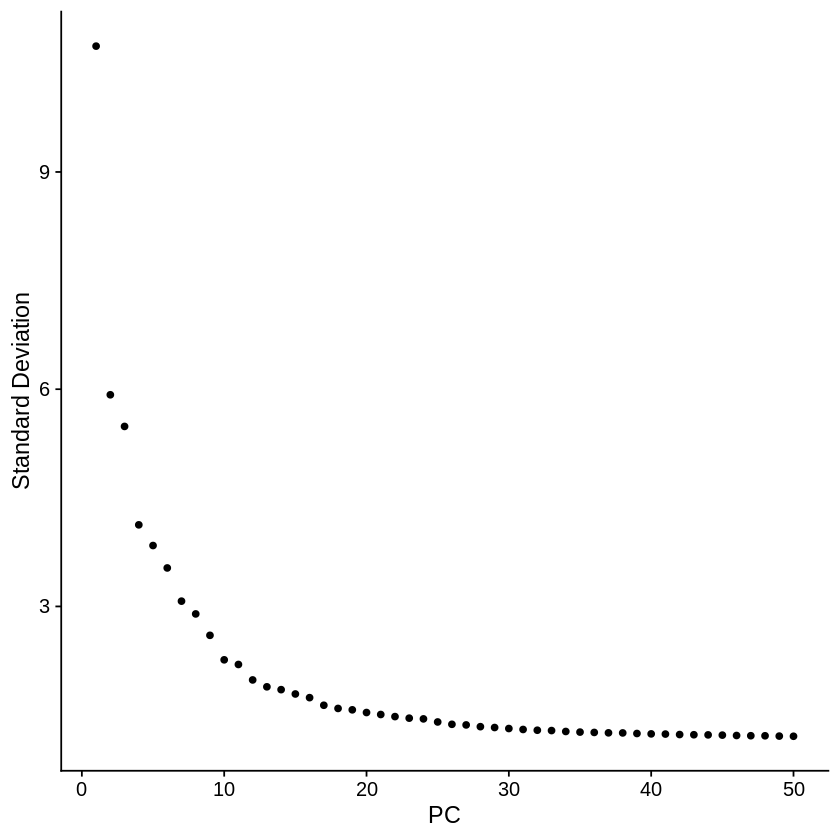

In [28]:
ElbowPlot(dataobj, ndims = 80) 
# pdf(paste0(datasetName,"seurat.elbowplot.pdf"))

In [29]:
dev.off()
pcDim = 20 # set as 75 in this case 
dataobj <- RunUMAP(dataobj, dims = 1:pcDim)
DimPlot(dataobj, reduction = "umap", label = TRUE)
# ggsave(paste0(datasetName,".seurat.umap.tiff", plot = p_umap, width = 8, height = 5)

null device 
          1

01:35:50 UMAP embedding parameters a = 0.9922 b = 1.112

01:35:50 Read 19128 rows and found 20 numeric columns

01:35:50 Using Annoy for neighbor search, n_neighbors = 30

01:35:50 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

01:35:52 Writing NN index file to temp file /tmp/Rtmpdx02bK/file542b409903e

01:35:52 Searching Annoy index using 1 thread, search_k = 3000

01:35:59 Annoy recall = 100%

01:35:59 Commencing smooth kNN distance calibration using 1 thread

01:36:00 Initializing from normalized Laplacian + noise

01:36:01 Commencing optimization for 200 epochs, with 869182 positive edges

01:36:20 Optimization finished



In [30]:
# Cluster the cells
dataobj <- FindNeighbors(dataobj, reduction = "pca", dims = 1:pcDim, nn.eps = 0.5)
dataobj <- FindClusters(dataobj, resolution = 0.1, n.start = 5)
# umap
dataobj <- RunUMAP(dataobj, dims = 1:pcDim)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 19128
Number of edges: 658830

Running Louvain algorithm...
Maximum modularity in 5 random starts: 0.9772
Number of communities: 14
Elapsed time: 1 seconds


01:36:25 UMAP embedding parameters a = 0.9922 b = 1.112

01:36:25 Read 19128 rows and found 20 numeric columns

01:36:25 Using Annoy for neighbor search, n_neighbors = 30

01:36:25 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

01:36:27 Writing NN index file to temp file /tmp/Rtmpdx02bK/file542b159da384

01:36:27 Searching Annoy index using 1 thread, search_k = 3000

01:36:34 Annoy recall = 100%

01:36:34 Commencing smooth kNN distance calibration using 1 thread

01:36:35 Initializing from normalized Laplacian + noise

01:36:36 Commencing optimization for 200 epochs, with 869182 positive edges

01:36:55 Optimization finished



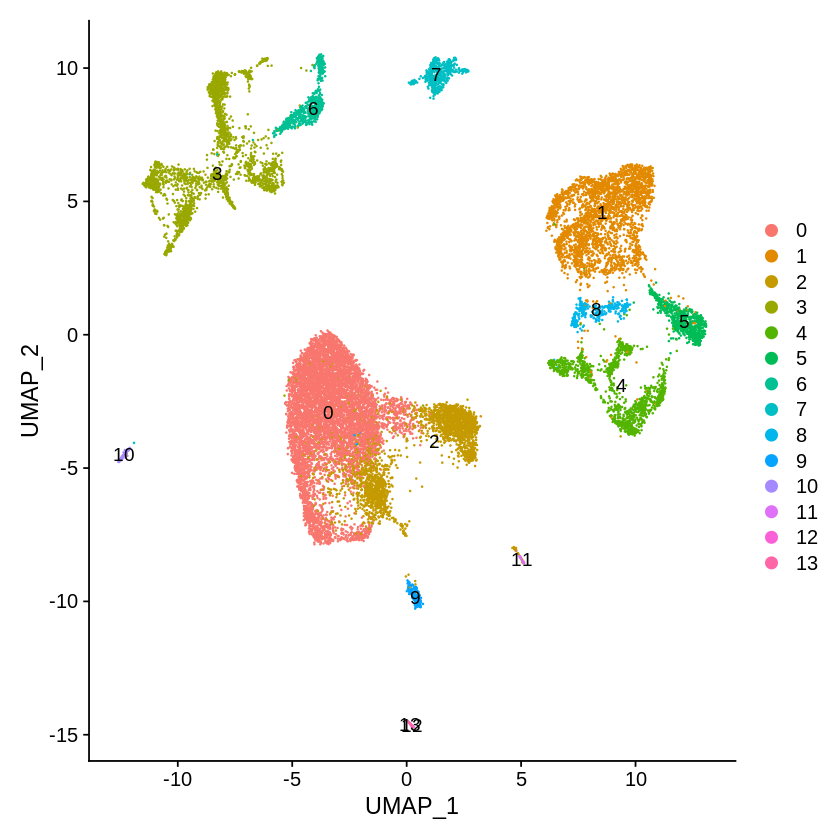

In [31]:
p_umap <- DimPlot(dataobj, reduction = "umap", label = TRUE)
p_umap

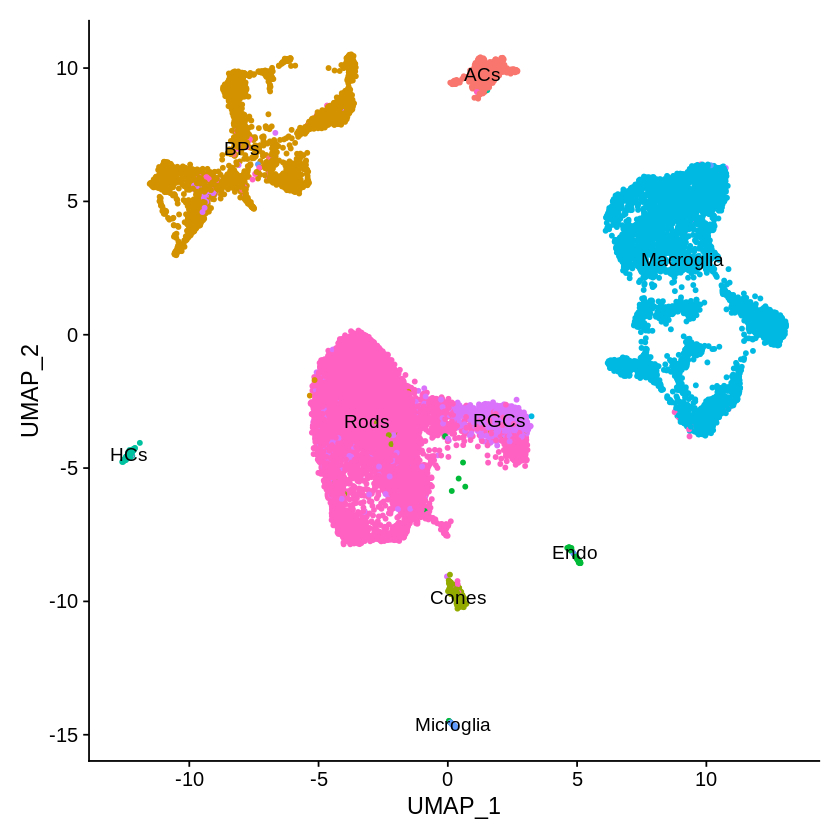

In [32]:
p_umap2 <- DimPlot(dataobj, reduction = "umap", label = TRUE, group.by = "cell_cluster", pt.size=1)+ NoLegend()
p_umap2

In [16]:
ggsave(paste0(datasetName,".seurat.umap_orig.tiff"), plot = p_umap2, width = 8, height = 5)

In [17]:
# Finding cluster markers 
dataobj.markers <- FindAllMarkers(dataobj, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
write.table(dataobj.markers, file = paste0(datasetName,".seurat.markers.txt"), sep = "\t", quote = F, row.names = F, col.names = T)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13



In [33]:
new.cluster.ids <- c('Eye-Nerve tissue-Rod cell-PDE6A', 'Eye-Nerve tissue-Muller cell-GLUL', 'Eye-Nerve tissue-Retina ganglion cell-NEFL',
                    'Eye-Nerve tissue-Bipolar cell-CAMK2B', 'Eye-Nerve tissue-Muller cell-GLUL', 'Eye-Nerve tissue-Muller cell-GLUL',
                     'Eye-Nerve tissue-Bipolar cell-CAMK2B', 'Eye-Nerve tissue-Amacrine cell-GAD1','Eye-Nerve tissue-Muller cell-GLUL',
                    'Eye-Nerve tissue-Cone cell-ARR3', 'Eye-Nerve tissue-Horizontal cell-ONECUT1', 'Eye-Epithelial tissue-Endothelial cell-SPARC',
                    'Eye-Nerve tissue-Microglia-C1QA', 'Eye-Nerve tissue-Microglia-C1QA')
names(new.cluster.ids) <- levels(dataobj)
dataobj <- RenameIdents(dataobj, new.cluster.ids)

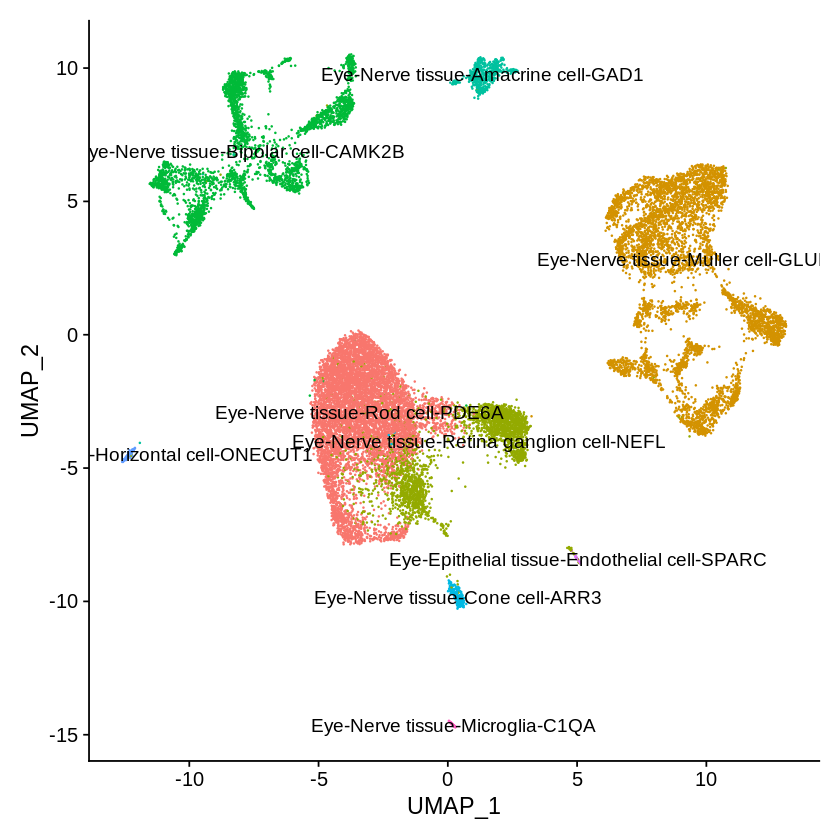

In [34]:
p_umap2 <- DimPlot(dataobj, reduction = "umap", label = TRUE) + NoLegend()
p_umap2

In [35]:
ggsave(paste0(datasetName,".seurat.umap_hcad.tiff"), plot = p_umap2, width = 8, height = 5)

In [ ]:
saveRDS(dataobj, file = paste0(datasetName,".10x.seuratobj.rds"))

In [55]:
annotation <- as.data.frame(cbind(colnames(data.matrix)[colnames(data.matrix) %in% labels(Idents(dataobj))], as.character(data.annotation[colnames(data.matrix) %in% labels(Idents(dataobj)), ]), seurat_cluster = as.character(Idents(dataobj))))
annotation <- annotation[, -1]
annotation <- annotation[order(annotation$seurat_cluster), ]
print(annotation)

             V2 seurat_cluster
1          Rods              0
2          Rods              0
10         Rods              0
15         Rods              0
16         Rods              0
18         Rods              0
20         Rods              0
24         Rods              0
27         Rods              0
34         Rods              0
36         Rods              0
42         Rods              0
45         Rods              0
46         Rods              0
47         Rods              0
49         Rods              0
54         Rods              0
56         Rods              0
60         Rods              0
62         Rods              0
70         Rods              0
71         Rods              0
74         Rods              0
78         Rods              0
83         Rods              0
84         Rods              0
85         Rods              0
92         Rods              0
93         Rods              0
97         Rods              0
102        Rods              0
103     

In [56]:
ggsave(paste0(datasetName,".seurat.umap.tiff"), plot = p_umap, width = 8, height = 5)

In [ ]:
saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))